Импорт нужных библиотек для математики и работы с csv 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

Получение данных

In [3]:
df = pd.read_csv('..\\resources\\Student_Performance.csv')
df['Work Per Free Time'] = df['Hours Studied'] / (24 - df['Hours Studied'] - df['Sleep Hours'])
#df.pop('Hours Studied')
#df.pop('Sleep Hours')
df

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  Work Per Free Time  
0                                    1               91.0            0.875000  
1                                    2               65.0            0.250000  
2                                    2               45.0            0.888889  
3                                    2               36.0            0.357143  
4                                    5               66.0            0.777778  
...                                ...                ...                 ...  
9995                                 2               23.0            0.052632  
9996                                 5               58.0            0.777778  
9997                                 5               74.0            0.600000  
9998                                 0               95.0            1.125000  
9999                                 1               64.0            0.777778  

[10000 rows x 7 columns]

Произведем кодирование категориальных признаков

In [4]:
ex_count = len(df['Extracurricular Activities'])

df['Extracurricular Activities'] = np.where((df["Extracurricular Activities"] == "Yes"), 1, df["Extracurricular Activities"])
df['Extracurricular Activities'] = np.where((df["Extracurricular Activities"] == "No"), 0, df["Extracurricular Activities"])

df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)

df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Papers Practiced  Performance Index  Work Per Free Time  
0                                    1               91.0            0.875000  
1                                    2               65.0            0.250000  
2                                    2               45.0            0.888889  
3                                    2               36.0            0.357143  
4                                    5               66.0            0.777778  
...                                ...                ...                 ...  
9995                                 2               23.0            0.052632  
9996                                 5               58.0            0.777778  
9997                                 5               74.0            0.600000  
9998                                 0               95.0            1.125000  
9999                                 1               64.0            0.777778  

[10000 rows x 7 columns]

Визуализация данных

In [5]:
for col_name, params in df.items():
    count = len(params)
    mean = sum(params) / count
    min_value = min(params)
    max_value = max(params)
    
    # Рассчитаем стандартное отклонение σ = √(Σ(xi - x̄)^2 / (n - 1))
    denominator = count - 1
    numerator = 0
    for value in params:
        numerator += (value - mean)**2
    standard_deviation = (numerator / denominator)**(1/2)
    
    # Расчёт квантилей
    
    # Квантиль - это число, которое разделяет упорядоченную выборку на две части, так,
    # что определенная доля значений находится в каждой из них.
    sorted_params = sorted(params)
    q25 = None
    q50 = None
    q75 = None
    tmp_count = 0
    for val in sorted_params:
        tmp_count += 1
        if q25 is None and tmp_count / count > 0.25:
            q25 = val
        if q50 is None and tmp_count / count > 0.50:
            q50 = val
        if q75 is None and tmp_count / count > 0.75:
            q75 = val
            break
            
    # Вывод данных для колонки
    print("Название столбца: ", col_name)
    print("Среднее значение: ", mean)
    print("Максимальное значение: ", max_value)
    print("Минимальное значение: ", min_value)
    print("Стандартное отклонение: ", standard_deviation)
    print("Квантиль 0.25: ", q25)
    print("Квантиль 0.50: ", q50)
    print("Квантиль 0.75: ", q75)
    print("")

Название столбца:  Hours Studied
Среднее значение:  4.9929
Максимальное значение:  9
Минимальное значение:  1
Стандартное отклонение:  2.589308796185612
Квантиль 0.25:  3
Квантиль 0.50:  5
Квантиль 0.75:  7

Название столбца:  Previous Scores
Среднее значение:  69.4457
Максимальное значение:  99
Минимальное значение:  40
Стандартное отклонение:  17.343152251047066
Квантиль 0.25:  54
Квантиль 0.50:  69
Квантиль 0.75:  85

Название столбца:  Extracurricular Activities
Среднее значение:  0.4948
Максимальное значение:  1
Минимальное значение:  0
Стандартное отклонение:  0.49999795979182254
Квантиль 0.25:  0
Квантиль 0.50:  0
Квантиль 0.75:  1

Название столбца:  Sleep Hours
Среднее значение:  6.5306
Максимальное значение:  9
Минимальное значение:  4
Стандартное отклонение:  1.6958629765176023
Квантиль 0.25:  5
Квантиль 0.50:  7
Квантиль 0.75:  8

Название столбца:  Sample Question Papers Practiced
Среднее значение:  4.5833
Максимальное значение:  9
Минимальное значение:  0
Стандартное откл

In [6]:
df.describe(include="all")

Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  \
count  10000.000000                      10000.000000       10000.000000   
mean       6.530600                          4.583300          55.224800   
std        1.695863                          2.867348          19.212558   
min        4.000000                          0.000000          10.000000   
25%        5.000000                          2.000000          40.000000   
50%        7.000000                          5.000000          55.000000   
75%        8.000000                          7.000000          71.000000   
max        9.000000                          9.000000         100.000000   

       Work Per Free Time  
count        10000.000000  
mean             0.479445  
std              0.352638  
min              0.052632  
25%              0.187500  
50%              0.416667  
75%              0.700000  
max              1.500000

Проверка отсутствующих значений

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int32  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
 6   Work Per Free Time                10000 non-null  float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 507.9 KB


In [8]:
df.shape

(10000, 7)

In [9]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Hours Studied
Hours Studied
False    10000
Name: count, dtype: int64
 
Previous Scores
Previous Scores
False    10000
Name: count, dtype: int64
 
Extracurricular Activities
Extracurricular Activities
False    10000
Name: count, dtype: int64
 
Sleep Hours
Sleep Hours
False    10000
Name: count, dtype: int64
 
Sample Question Papers Practiced
Sample Question Papers Practiced
False    10000
Name: count, dtype: int64
 
Performance Index
Performance Index
False    10000
Name: count, dtype: int64
 
Work Per Free Time
Work Per Free Time
False    10000
Name: count, dtype: int64
 


In [10]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Work Per Free Time                  0
dtype: int64

Отсутствующие значения не найдены

Нормировка данных

Разделим данные на независимые переменные и целевой атрибут
Performance Index - целевой атрибут, остальные - независимые переменные

In [11]:
X = df.drop('Performance Index', axis=1)
Y = df['Performance Index']

Визуализация распределения данных

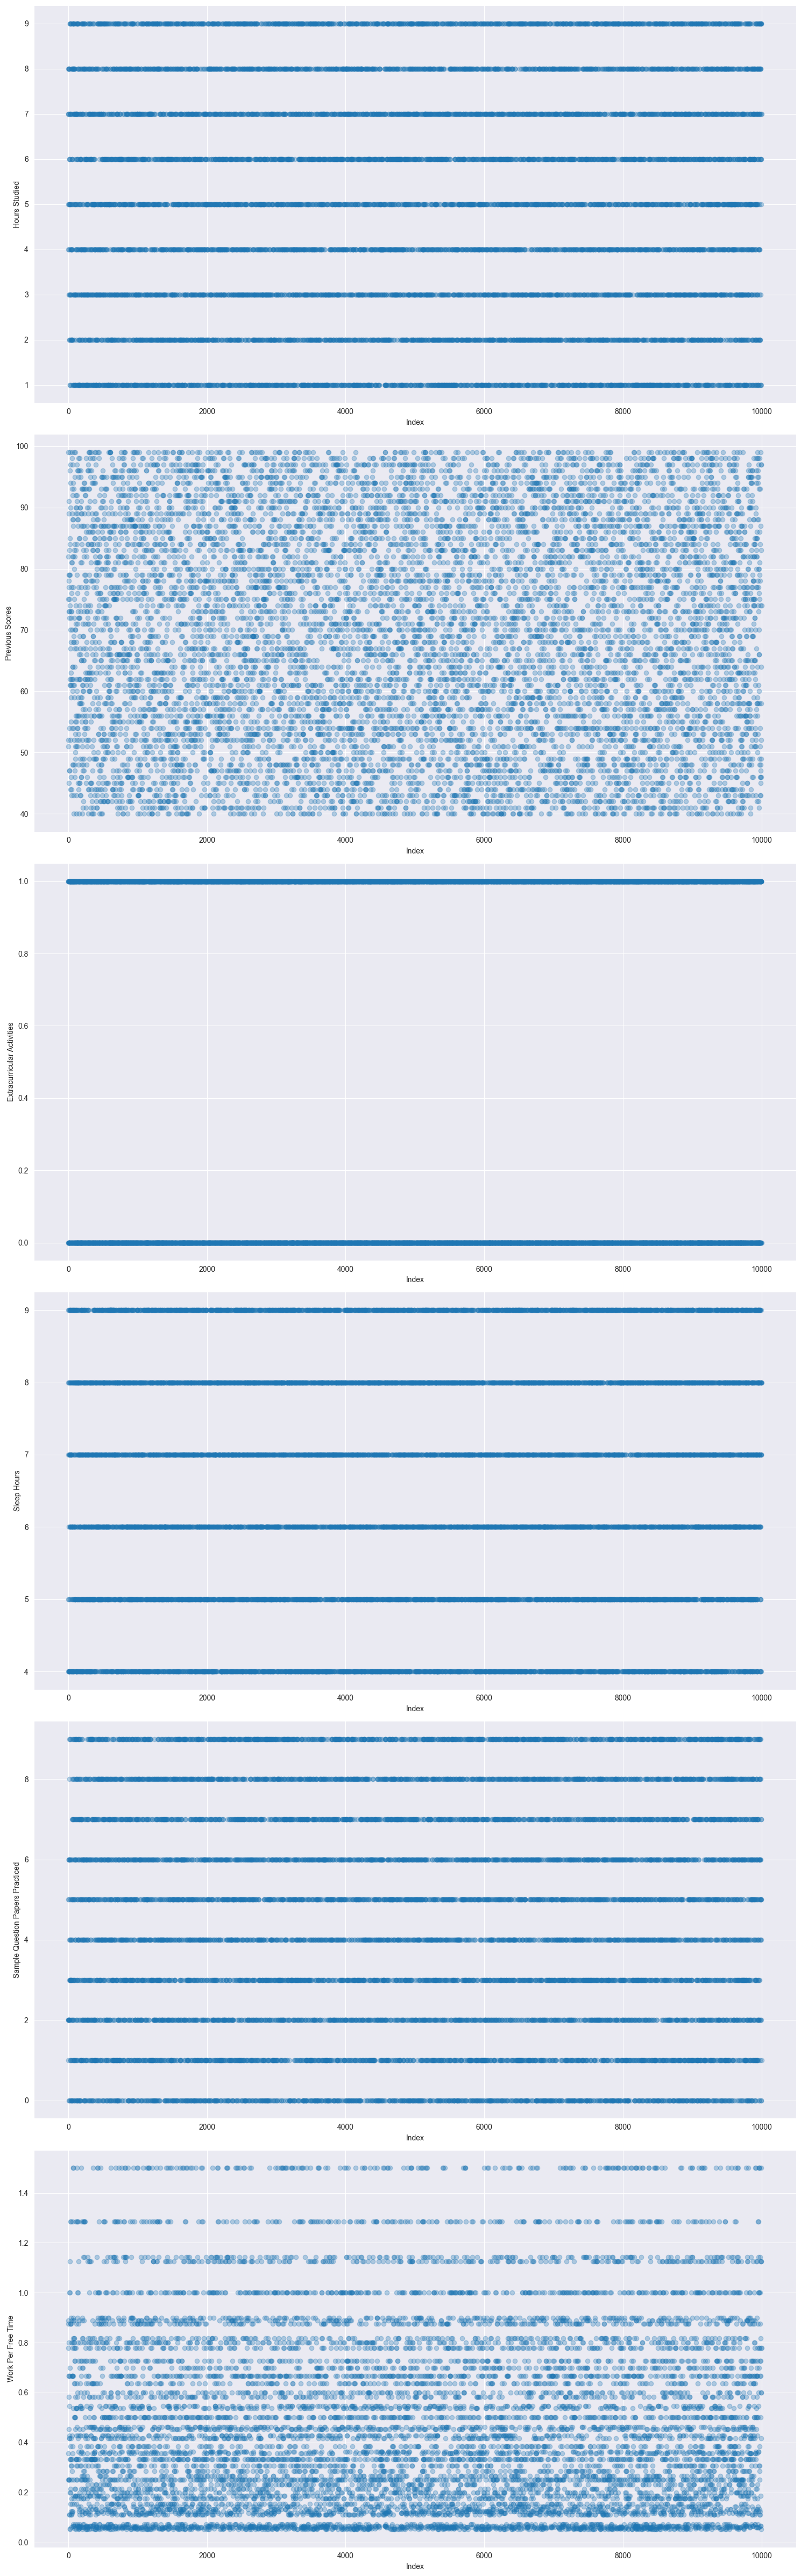

In [12]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Нормировка min max

In [13]:
for column_name, params in X.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X[column_name] = (X[column_name] - minimum) / difference

Визуализация после нормировки

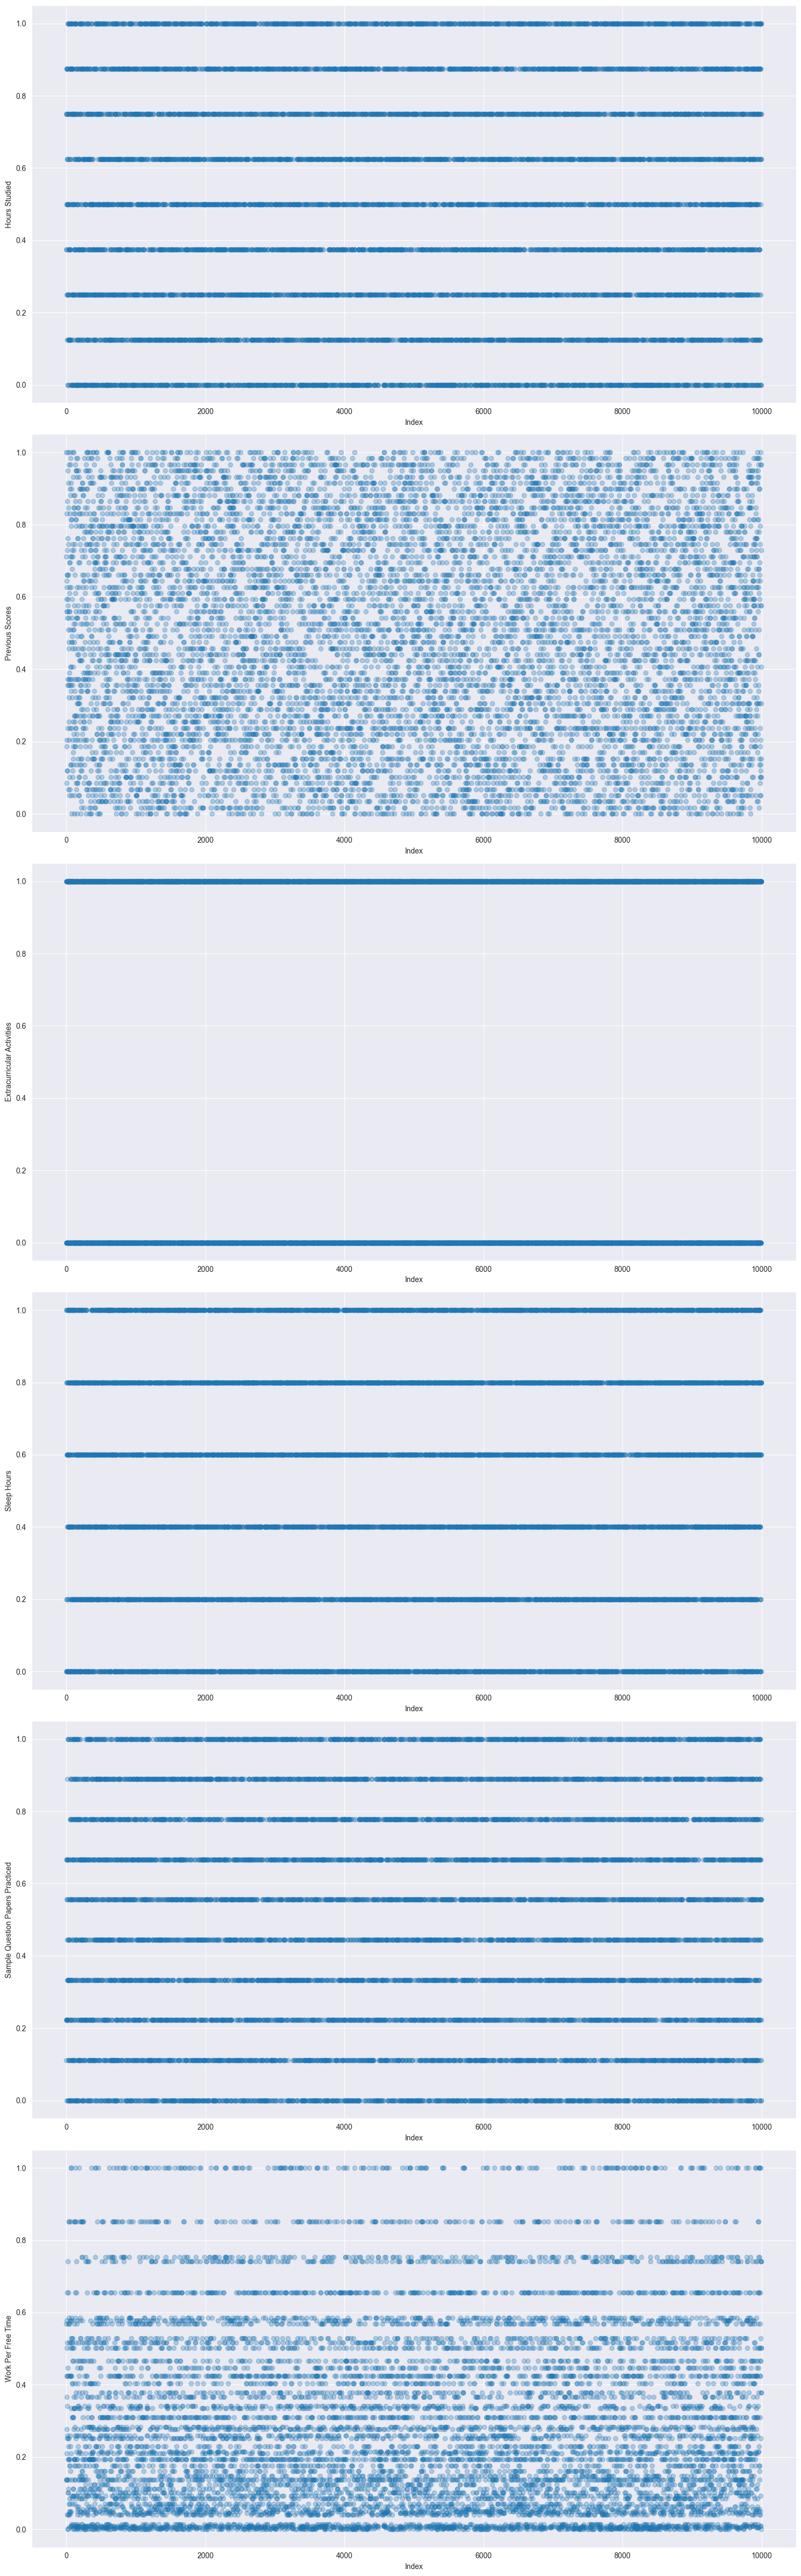

In [14]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Реализация линейной регрессии

In [15]:
X

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0             0.750         1.000000                         1.0          1.0   
1             0.375         0.711864                         0.0          0.0   
2             0.875         0.186441                         1.0          0.6   
3             0.500         0.203390                         1.0          0.2   
4             0.750         0.593220                         0.0          0.8   
...             ...              ...                         ...          ...   
9995          0.000         0.152542                         1.0          0.0   
9996          0.750         0.406780                         1.0          0.8   
9997          0.625         0.728814                         1.0          0.8   
9998          1.000         0.966102                         1.0          0.6   
9999          0.750         0.576271                         0.0          0.8   

      Sample Question Papers Practiced  Work Per Free Time  
0                             0.111111            0.568182  
1                             0.222222            0.136364  
2                             0.222222            0.577778  
3                             0.222222            0.210390  
4                             0.555556            0.501010  
...                                ...                 ...  
9995                          0.222222            0.000000  
9996                          0.555556            0.501010  
9997                          0.555556            0.378182  
9998                          0.000000            0.740909  
9999                          0.111111            0.501010  

[10000 rows x 6 columns]

In [16]:
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Разделим данные на тренировочную и обучающую выборку

In [17]:
import random
indexes = list(range(len(X)))
test_size = 0.2
random.seed(42)
random.shuffle(indexes)
split_index = int(len(X) * test_size)

X_train = X.iloc[indexes[split_index:]]
X_test = X.iloc[indexes[:split_index]]
Y_train = Y.iloc[indexes[split_index:]]
Y_test = Y.iloc[indexes[:split_index]]

In [18]:
X_train

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
1518          0.875         0.728814                         1.0          0.6   
3059          0.625         0.966102                         0.0          1.0   
4585          0.250         0.711864                         0.0          0.0   
7120          0.375         0.067797                         0.0          0.0   
3622          0.625         0.355932                         0.0          0.6   
...             ...              ...                         ...          ...   
3657          0.750         0.152542                         0.0          0.6   
4012          0.875         0.152542                         0.0          1.0   
4506          0.500         0.016949                         1.0          0.8   
409           0.250         0.677966                         0.0          0.6   
1824          0.625         0.966102                         0.0          1.0   

      Sample Question Papers Practiced  Work Per Free Time  
1518                          0.888889            0.577778  
3059                          0.111111            0.424242  
4585                          0.111111            0.085561  
7120                          0.000000            0.136364  
3622                          0.666667            0.340496  
...                                ...                 ...  
3657                          0.777778            0.447273  
4012                          0.888889            0.753247  
4506                          0.666667            0.277686  
409                           0.333333            0.111688  
1824                          0.333333            0.424242  

[8000 rows x 6 columns]

In [19]:
X_test

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
3771          0.875         0.322034                         1.0          1.0   
6672          0.000         0.830508                         0.0          0.8   
7261          0.750         0.101695                         0.0          0.6   
760           0.625         0.067797                         0.0          1.0   
3779          0.375         0.576271                         0.0          0.6   
...             ...              ...                         ...          ...   
335           0.500         0.949153                         1.0          0.0   
591           0.500         0.338983                         0.0          1.0   
906           1.000         0.949153                         1.0          0.2   
2056          0.375         0.881356                         0.0          1.0   
5230          0.875         0.491525                         1.0          0.0   

      Sample Question Papers Practiced  Work Per Free Time  
3771                          0.888889            0.753247  
6672                          0.888889            0.009697  
7261                          0.444444            0.447273  
760                           0.888889            0.424242  
3779                          0.777778            0.176224  
...                                ...                 ...  
335                           0.666667            0.193939  
591                           0.000000            0.309091  
906                           0.888889            0.585455  
2056                          0.000000            0.214876  
5230                          0.555556            0.424242  

[2000 rows x 6 columns]

In [20]:
Y_train

1518    79.0
3059    86.0
4585    64.0
7120    25.0
3622    50.0
        ... 
3657    39.0
4012    42.0
4506    26.0
409     59.0
1824    89.0
Name: Performance Index, Length: 8000, dtype: float64

In [21]:
Y_test

3771    55.0
6672    66.0
7261    37.0
760     35.0
3779    56.0
        ... 
335     82.0
591     49.0
906     96.0
2056    73.0
5230    61.0
Name: Performance Index, Length: 2000, dtype: float64

Приведем к матричному виду

In [22]:
X_train_matrix = np.c_[np.ones(len(X_train.values)), X_train.values]
X_test_matrix = np.c_[np.ones(len(X_test.values)), X_test.values]
Y_train_matrix = Y_train.values
Y_test_matrix = Y_test.values

In [23]:
X_train_matrix

array([[1.        , 0.875     , 0.72881356, ..., 0.6       , 0.88888889,
        0.57777778],
       [1.        , 0.625     , 0.96610169, ..., 1.        , 0.11111111,
        0.42424242],
       [1.        , 0.25      , 0.71186441, ..., 0.        , 0.11111111,
        0.0855615 ],
       ...,
       [1.        , 0.5       , 0.01694915, ..., 0.8       , 0.66666667,
        0.27768595],
       [1.        , 0.25      , 0.6779661 , ..., 0.6       , 0.33333333,
        0.11168831],
       [1.        , 0.625     , 0.96610169, ..., 1.        , 0.33333333,
        0.42424242]])

In [24]:
X_test_matrix

array([[1.        , 0.875     , 0.3220339 , ..., 1.        , 0.88888889,
        0.75324675],
       [1.        , 0.        , 0.83050847, ..., 0.8       , 0.88888889,
        0.00969697],
       [1.        , 0.75      , 0.10169492, ..., 0.6       , 0.44444444,
        0.44727273],
       ...,
       [1.        , 1.        , 0.94915254, ..., 0.2       , 0.88888889,
        0.58545455],
       [1.        , 0.375     , 0.88135593, ..., 1.        , 0.        ,
        0.21487603],
       [1.        , 0.875     , 0.49152542, ..., 0.        , 0.55555556,
        0.42424242]])

In [25]:
Y_train_matrix

array([79., 86., 64., ..., 26., 59., 89.])

In [26]:
Y_test_matrix

array([55., 66., 37., ..., 96., 73., 61.])

В данном случае мы имеем дело с большим объемом данных, при этом нет мультиколлинеарности
поэтому используем матричный метод

In [27]:
# Y = BX + e

# B = (X`X)^(-1) X'Y

B = np.dot(np.dot(np.linalg.inv(np.dot(X_train_matrix.transpose(), X_train_matrix)), X_train_matrix.transpose()), Y_train_matrix)
B     

array([11.50922337, 22.48043133, 60.10388489,  0.61589885,  2.32625202,
        1.70747863,  0.48723312])

In [28]:
matrix_method_prediction = np.dot(X_test_matrix, B)
matrix_method_prediction

array([55.36200556, 64.8094942 , 36.85436304, ..., 93.92157073,
       75.34324735, 62.49339132])

Анализ и оценка моделей


Формула для подсчета R2 score выглядит следующим образом:
R2 = 1 - (SS_res / SS_tot)
где:
SS_res - сумма квадратов остатков (разница между фактическими и предсказанными значениями);
SS_tot - общая сумма квадратов (разница между фактическими значениями и средним значением зависимой переменной).

In [29]:
columns = X_train.columns
mean = sum(Y_test.values) / len(Y_test.values)


full_SS_res = sum(np.square(Y_test.values - matrix_method_prediction))
full_SS_tot = sum(np.square(Y_test.values - mean))
r2_score = 1 - (full_SS_res / full_SS_tot)

print("R2 полной таблицы: ", r2_score)
print("")

for i, column in enumerate(columns):
    X_train_matrix = np.c_[np.ones(len(X_train.values)), X_train.drop(column, axis=1).values]
    X_test_matrix = np.c_[np.ones(len(X_test.values)), X_test.drop(column, axis=1).values]
    Y_train_matrix = Y_train.values
    Y_test_matrix = Y_test.values
    
    B = np.dot(np.dot(np.linalg.inv(np.dot(X_train_matrix.transpose(), X_train_matrix)), X_train_matrix.transpose()), Y_train_matrix)
    matrix_method_prediction = np.dot(X_test_matrix, B)
    
    SS_res = sum(np.square(Y_test.values - matrix_method_prediction))
    SS_tot = sum(np.square(Y_test.values - mean))
    
    r2_matrix = 1 - (SS_res / SS_tot)
    
    print("Убрали столбец: ", column)
    print("R2: ", r2_matrix)
    print("Разницы с R2 полной таблицы: ", r2_matrix - r2_score)
    print("")
    
    
    
    

R2 полной таблицы:  0.9886728200505739

Убрали столбец:  Hours Studied
R2:  0.9767782751595044
Разницы с R2 полной таблицы:  -0.011894544891069447

Убрали столбец:  Previous Scores
R2:  0.1396034846066131
Разницы с R2 полной таблицы:  -0.8490693354439608

Убрали столбец:  Extracurricular Activities
R2:  0.9884196356289457
Разницы с R2 полной таблицы:  -0.0002531844216281387

Убрали столбец:  Sleep Hours
R2:  0.987758893283582
Разницы с R2 полной таблицы:  -0.0009139267669918683

Убрали столбец:  Sample Question Papers Practiced
R2:  0.9876733815161598
Разницы с R2 полной таблицы:  -0.0009994385344140877

Убрали столбец:  Work Per Free Time
R2:  0.988663557365881
Разницы с R2 полной таблицы:  -9.26268469292335e-06
